<a href="https://colab.research.google.com/github/RutvinaPapadkar/Data_appliances_energy/blob/main/data_appliances_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru) and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non-predictive attributes (parameters).**

Data Description date time year-month-day hour:minute:second

date - time year-month-day hour:minute:second

Appliances - energy use in Wh (Dependent variable)

lights - energy use of light fixtures in the house in Wh (Drop this column)

T1 - Temperature in kitchen area, in Celsius

RH1 - Humidity in kitchen area, in %

T2 - Temperature in living room area, in Celsius

RH2 - Humidity in living room area, in %

T3 - Temperature in laundry room area

RH3 - Humidity in laundry room area, in %

T4 - Temperature in office room, in Celsius

RH4 - Humidity in office room, in %

T5 - Temperature in bathroom, in Celsius

RH5 - Humidity in bathroom, in %

T6 - Temperature outside the building (north side), in Celsius

RH6 - Humidity outside the building (north side), in %

T7 - Temperature in ironing room, in Celsius

RH7 - Humidity in ironing room, in %

T8 - Temperature in teenager room 2, in Celsius

RH8 - Humidity in teenager room 2, in %

T9 - Temperature in parents room, in Celsius

RH9 - Humidity in parents room, in %

T_out - Temperature outside (from Chievres weather station), in Celsius

Pressure - (from Chievres weather station), in mm Hg RHout

Humidity - outside (from Chievres weather station), in %

Wind speed - (from Chievres weather station), in m/s

Visibility - (from Chievres weather station), in km

Tdewpoint - (from Chievres weather station), Â°C

rv1 - Random variable 1, nondimensional

rv2 - Random variable 2, nondimensional

**Where indicated, hourly data (then interpolated) from the nearest airport weather station(Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis,rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy import stats
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

import time
from math import sqrt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip install emath@git+git://github.com/whitead/emoji-math.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning git://github.com/whitead/emoji-math.git to /tmp/pip-install-e3obdx_x/emath_a023ea09ddbc428b87c200e4d8bbaa93
  Running command git clone -q git://github.com/whitead/emoji-math.git /tmp/pip-install-e3obdx_x/emath_a023ea09ddbc428b87c200e4d8bbaa93
  fatal: unable to connect to github.com:
  github.com[0: 140.82.114.4]: errno=Connection timed out

ERROR: Could not find a version that satisfies the requirement emath (unavailable) (from versions: none)
ERROR: No matching distribution found for emath (unavailable)


In [ ]:
# Loading csv file and creating a data frame 

appliances_energy_df=pd.read_csv("data_application_energy.csv")

In [ ]:
# Checking the data set's first 5 rows
appliances_energy_df.head()
     

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [ ]:
# Checking the data set's last 5 rows
appliances_energy_df.tail()

date  Appliances  lights         T1       RH_1  \
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3    T4  ...    T9     RH_9  \
19730  25.890000  42.025714  27.200000  41.163333  24.7  ...  23.2  46.7900   
19731  25.754000  42.080000  27.133333  41.223333  24.7  ...  23.2  46.7900   
19732  25.628571  42.768571  27.050000  41.690000  24.7  ...  23.2  46.7900   
19733  25.414000  43.036000  26.890000  41.290000  24.7  ...  23.2  46.8175   
19734  25.264286  42.971429  26.823333  41.156667  24.7  ...  23.2  46.8450   

           T_out  Press_mm_hg     RH_out  Windspeed  Visibility  Tdewpoint  \
19730  22.733333        755.2  55.666667   3.333333   23.666667  13.333333   
19731  22.600000        755.2  56.000000   3.500000   24.500000  13.300000   
19732  22.466667        755.2  56.333333   3.666667   25.333333  13.266667   
19733  22.333333        755.2  56.666667   3.833333   26.166667  13.233333   
19734  22.200000        755.2  57.000000   4.000000   27.000000  13.200000   

             rv1        rv2  
19730  43.096812  43.096812  
19731  49.282940  49.282940  
19732  29.199117  29.199117  
19733   6.322784   6.322784  
19734  34.118851  34.118851  

[5 rows x 29 columns]

In [ ]:
# Shape of the Data Set
print(f"The data frame have {appliances_energy_df.shape[0]} rows and {appliances_energy_df.shape[1]} columns.")

The data frame have 19735 rows and 29 columns.


In [ ]:
# Number of features and list of features
print(f"Total number of features in the data set are :",len(appliances_energy_df.columns))
print(list(appliances_energy_df.columns))

Total number of features in the data set are : 29
['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [ ]:
# Information about data frame

appliances_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [ ]:
# Statistical description of features
appliances_energy_df.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

*The feature "Appliances" represnt the energy consumption in Wh.The watt-hour (symbolized Wh) is a unit of energy equivalent to one watt (1 W) of power expended for one hour (1 h) of time. For the better interpretation,changing feature name to "Consumption".*

*Features lights,rv1, and rv2 are not useful so will drop these features from the data set.* 

In [ ]:
# Renaming column
appliances_energy_df.rename(columns={'Appliances':'Consumption'},inplace=True)

# Dropping Unneccesary columns
appliances_energy_df.drop(['lights','rv1','rv2'],inplace=True,axis=1)

*The relaionship between the Humidity and Temperature is inversely proportional. Relative humidity changes when temperatures change. Because warm air can hold more water vapor than cool air, relative humidity falls when the temperature rises if no moisture is added to the air.*

*Creating two columns for Average Humidity and Average Temperature.*

In [ ]:
# Average Temperature
appliances_energy_df['Avg_Temp']=(appliances_energy_df.T1 + appliances_energy_df.T2 + appliances_energy_df.T3
                                  + appliances_energy_df.T4 + appliances_energy_df.T5 + appliances_energy_df.T7
                                 + appliances_energy_df.T8 + appliances_energy_df.T9 ) / 8

appliances_energy_df['Avg_Temp'].apply(lambda x: format(x,'.2f'))

0        18.43
1        18.44
2        18.42
3        18.40
4        18.41
         ...  
19730    24.87
19731    24.85
19732    24.82
19733    24.76
19734    24.74
Name: Avg_Temp, Length: 19735, dtype: object

In [ ]:
# Average Humidity 
appliances_energy_df['Avg_Humidity']=(appliances_energy_df.RH_1 + appliances_energy_df.RH_2 + appliances_energy_df.RH_3
                                  + appliances_energy_df.RH_4 + appliances_energy_df.RH_5 + appliances_energy_df.RH_7
                                  + appliances_energy_df.RH_8 + appliances_energy_df.RH_9 ) / 8

appliances_energy_df['Avg_Humidity'].apply(lambda x: format(x,'.2f')) 

0        46.74
1        46.67
2        46.56
3        46.47
4        46.46
         ...  
19730    46.14
19731    46.09
19732    46.24
19733    46.24
19734    46.19
Name: Avg_Humidity, Length: 19735, dtype: object

Let's find out Null and Duplicates values if any......

In [ ]:
# Dulicate values 
appliances_energy_df.duplicated().sum()

0

In [ ]:
# Null Values
appliances_energy_df.isna().sum()

date            0
Consumption     0
T1              0
RH_1            0
T2              0
RH_2            0
T3              0
RH_3            0
T4              0
RH_4            0
T5              0
RH_5            0
T6              0
RH_6            0
T7              0
RH_7            0
T8              0
RH_8            0
T9              0
RH_9            0
T_out           0
Press_mm_hg     0
RH_out          0
Windspeed       0
Visibility      0
Tdewpoint       0
Avg_Temp        0
Avg_Humidity    0
dtype: int64

There are 0 rows with duplicate and Null values in data set

**Exploring Dependable Variable**

In [ ]:
appliances_energy_df['Consumption'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Consumption, dtype: float64

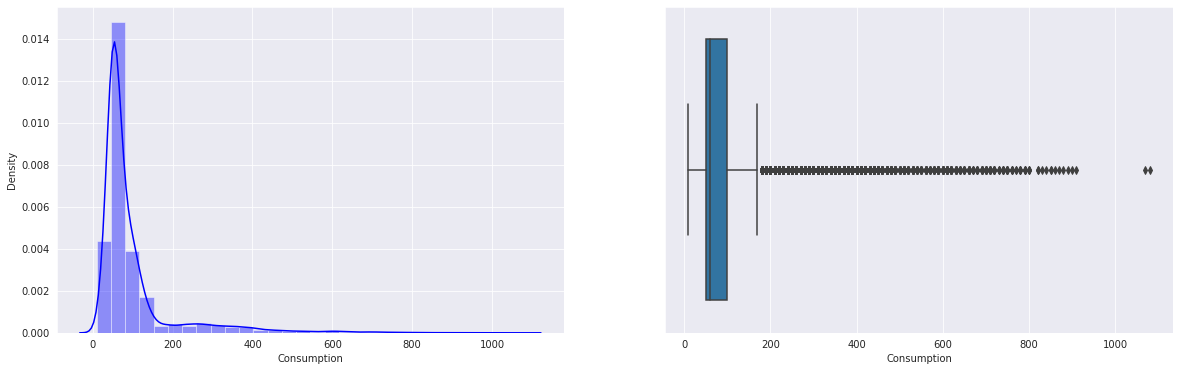

In [ ]:

plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

# Distribution of Energy Consumption
plt.subplot(1,2,1)
sns.distplot(appliances_energy_df.Consumption,bins=30,color='Blue')

# Box plot for Energy Consumption
plt.subplot(1,2,2)
sns.boxplot(appliances_energy_df.Consumption)

Data for the dependable variable "Consumption" is not normally distributed since it is positively skewed.

About 75% of the values fall between 10 W/hr and 100 W/hr.

The data has a standard deviation of 102.54, which indicates there are lots of outliers. 

**Exploraing Independent Variable**

In [ ]:

# Creating a seperate data frames for all temperature varibales and all Humidity variables

# Temprature Data Frame
Temperature_df=appliances_energy_df[['T1','T2','T3','T4','T5','T6','T7','T8','T9','Avg_Temp','T_out' ]]

# Renaming column
Temperature_df.rename(columns={'T1':'kitchen_Temp','T2': 'living_room_Temp','T3':'laundry_room_temp',
                               'T4':'office_room_temp','T5':'bathroom_temp','T6':'outside_building_temp',
                               'T7':'ironing_room_temp','T8':'teenager_room_temp',
                               'T9':'parents_room_temp','T_out':'Chievres_weather_station'},inplace=True)

In [ ]:
Temperature_df.describe()

kitchen_Temp  living_room_Temp  laundry_room_temp  office_room_temp  \
count  19735.000000      19735.000000       19735.000000      19735.000000   
mean      21.686571         20.341219          22.267611         20.855335   
std        1.606066          2.192974           2.006111          2.042884   
min       16.790000         16.100000          17.200000         15.100000   
25%       20.760000         18.790000          20.790000         19.530000   
50%       21.600000         20.000000          22.100000         20.666667   
75%       22.600000         21.500000          23.290000         22.100000   
max       26.260000         29.856667          29.236000         26.200000   

       bathroom_temp  outside_building_temp  ironing_room_temp  \
count   19735.000000           19735.000000       19735.000000   
mean       19.592106               7.910939          20.267106   
std         1.844623               6.090347           2.109993   
min        15.330000              -6.065000          15.390000   
25%        18.277500               3.626667          18.700000   
50%        19.390000               7.300000          20.033333   
75%        20.619643              11.256000          21.600000   
max        25.795000              28.290000          26.000000   

       teenager_room_temp  parents_room_temp      Avg_Temp  \
count        19735.000000       19735.000000  19735.000000   
mean            22.029107          19.485828     20.815611   
std              1.956162           2.014712      1.812567   
min             16.306667          14.890000     16.012708   
25%             20.790000          18.000000     19.663000   
50%             22.100000          19.390000     20.597500   
75%             23.390000          20.600000     21.764375   
max             27.230000          24.500000     26.061940   

       Chievres_weather_station  
count              19735.000000  
mean                   7.411665  
std                    5.317409  
min                   -5.000000  
25%                    3.666667  
50%                    6.916667  
75%                   10.408333  
max                   26.100000

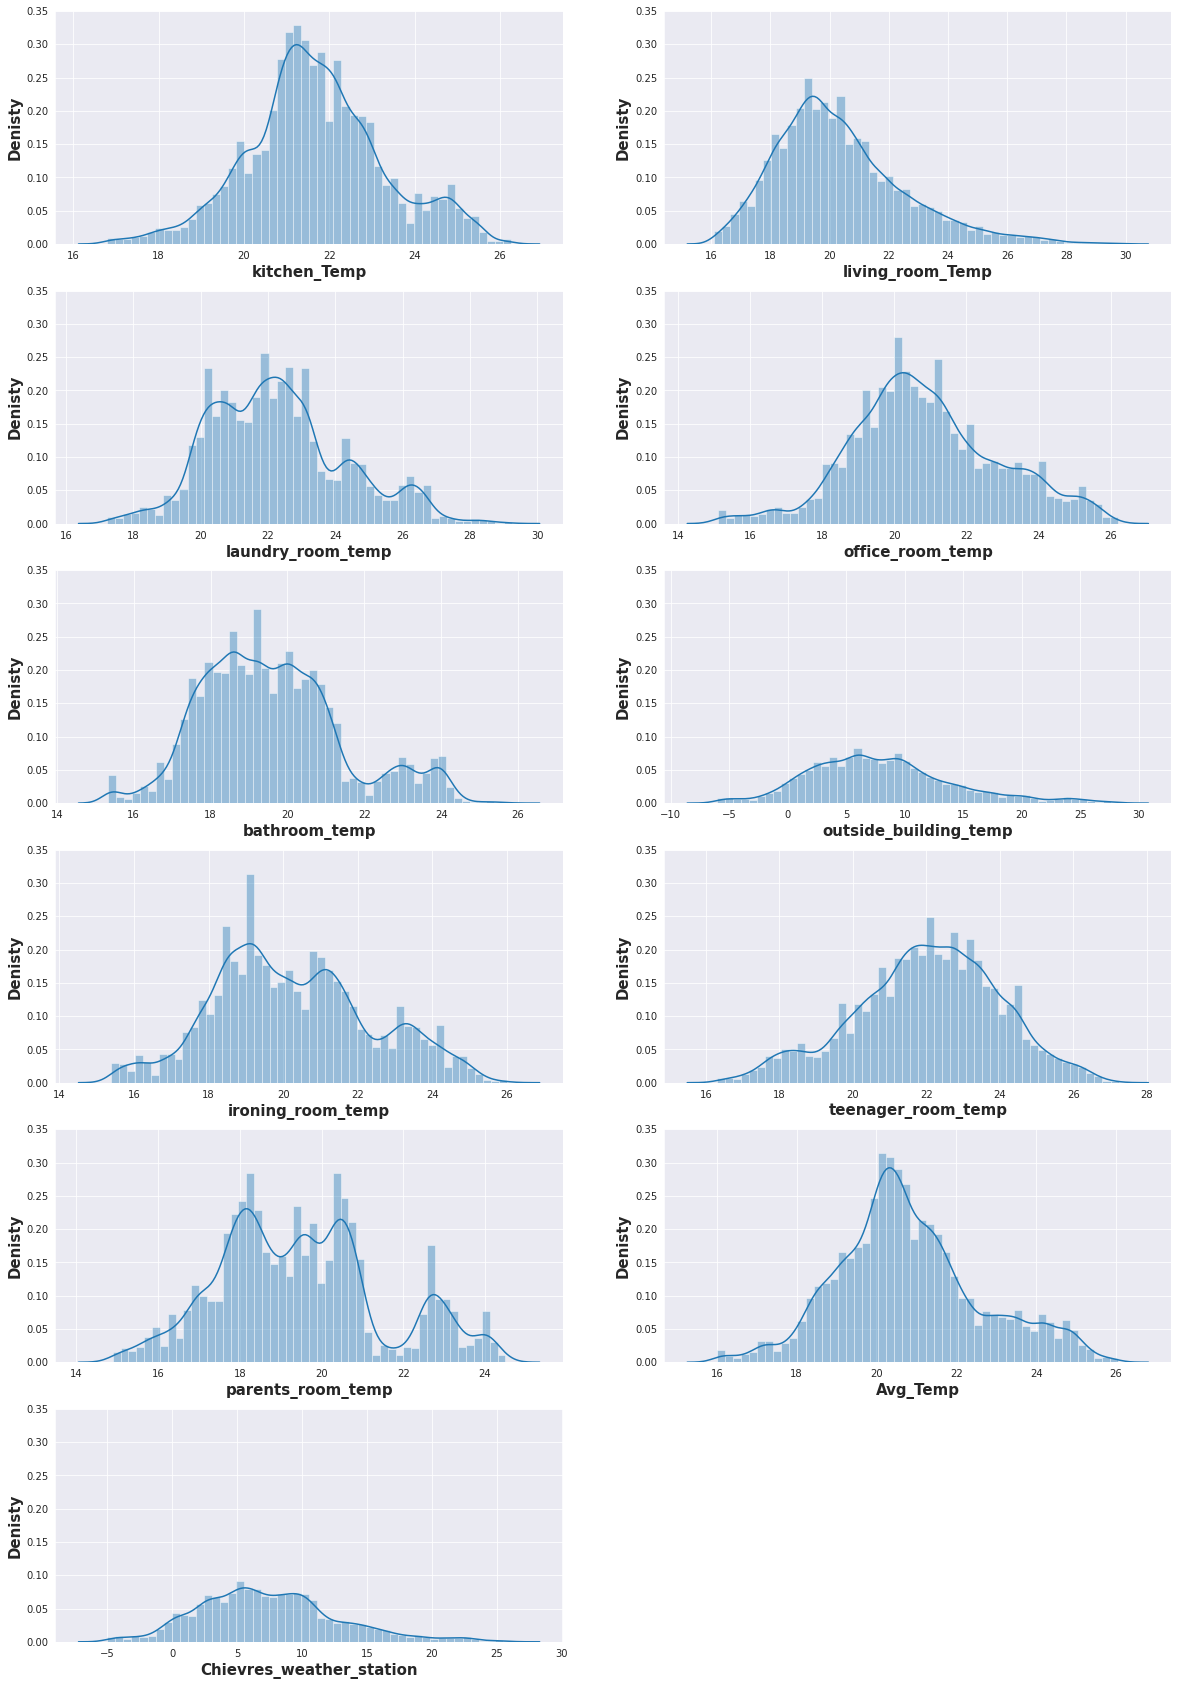

In [ ]:
# Let's create subplot of histogram for all temperature values

Feature=Temperature_df.columns.to_list()  # Lsit of all temperature variables

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 

while a < 6 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(6,2,figsize=(20,30))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('Density', fontsize=15,fontdict={"weight": "bold"})

for i in range (11):
  ax1=sns.distplot(Temperature_df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set(ylim=(0,0.35))
  ax1.set_ylabel('Denisty',size=15,fontdict={"weight": "bold"})

figure.delaxes(axis[5,1]) # Delete extra subplot


**Outside, the minimum temperature is -6.06°C, the maximum temperature is 28.29°C, and the average temperature is 7.91°C**.

**The average temperature inside is around 20.81°C, the parents' room has the lowest minimum temperature of 14.69°C, and the living room has the highest maximum temperature of 29.86°C, which shows that the difference between outside and inside is quite large. Inside a lot of radiator heaters are used to maintain the temperature inside each room.** 

In [ ]:
# Humidity Data Frame
Humidity_df=appliances_energy_df[['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6',
                                  'RH_7','RH_8','RH_9','Avg_Humidity','RH_out']]

# Renaming column
Humidity_df.rename(columns={'RH_1':'kitchen_humidity','RH_2': 'living_room_humidity','RH_3':'laundry_room_humidity',
                            'RH_4':'office_room_humidity','RH_5':'bathroom_humidity','RH_6':'outside_building_humidity',
                            'RH_7':'ironing_room_humidity','RH_8':'teenager_room_humidity',
                            'RH_9':'parents_room_humidity','RH_out':'Chievres_weather_station'},inplace=True)

In [ ]:
Humidity_df.describe()

kitchen_humidity  living_room_humidity  laundry_room_humidity  \
count      19735.000000          19735.000000           19735.000000   
mean          40.259739             40.420420              39.242500   
std            3.979299              4.069813               3.254576   
min           27.023333             20.463333              28.766667   
25%           37.333333             37.900000              36.900000   
50%           39.656667             40.500000              38.530000   
75%           43.066667             43.260000              41.760000   
max           63.360000             56.026667              50.163333   

       office_room_humidity  bathroom_humidity  outside_building_humidity  \
count          19735.000000       19735.000000               19735.000000   
mean              39.026904          50.949283                  54.609083   
std                4.341321           9.022034                  31.149806   
min               27.660000          29.815000                   1.000000   
25%               35.530000          45.400000                  30.025000   
50%               38.400000          49.090000                  55.290000   
75%               42.156667          53.663333                  83.226667   
max               51.090000          96.321667                  99.900000   

       ironing_room_humidity  teenager_room_humidity  parents_room_humidity  \
count           19735.000000            19735.000000           19735.000000   
mean               35.388200               42.936165              41.552401   
std                 5.114208                5.224361               4.151497   
min                23.200000               29.600000              29.166667   
25%                31.500000               39.066667              38.500000   
50%                34.863333               42.375000              40.900000   
75%                39.000000               46.536000              44.338095   
max                51.400000               58.780000              53.326667   

       Avg_Humidity  Chievres_weather_station  
count  19735.000000              19735.000000  
mean      41.221952                 79.750418  
std        3.977196                 14.901088  
min       30.842798                 24.000000  
25%       38.354583                 70.333333  
50%       40.572708                 83.666667  
75%       44.162176                 91.666667  
max       53.947153                100.000000

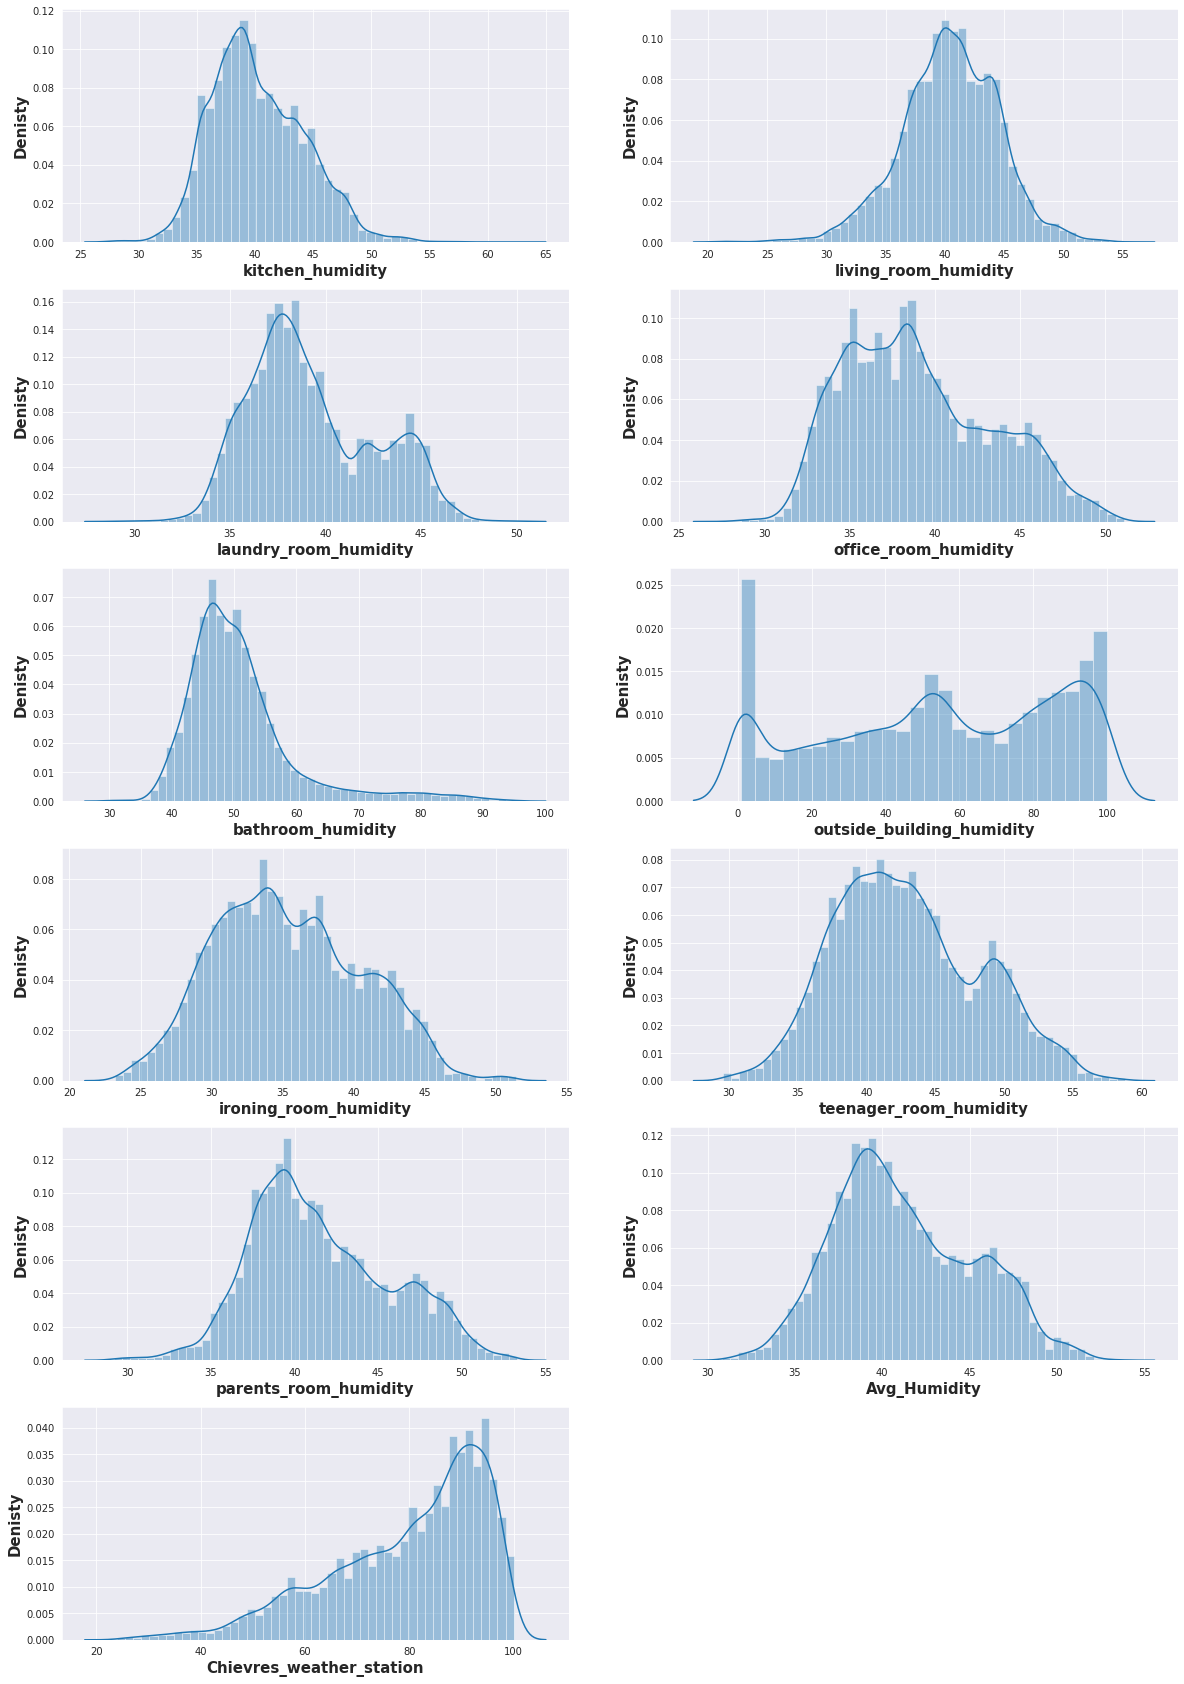

In [ ]:
# Let's create subplot of histogram for all Humidity values

Feature=Humidity_df.columns.to_list()  # List of all Humidity variables

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 
while a < 6 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots

figure,axis=plt.subplots(6,2,figsize=(20,30))

for i in range (11):
  ax1=sns.distplot(Humidity_df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Denisty',size=15,fontdict={"weight": "bold"})

figure.delaxes(axis[5,1])

**Ideally, a home should have a humidity level of about 45%. If it dips below 30%, it's much too dry, and if it's above 50%, the high humidity may start to feel uncomfortable.**

**The average humidity inside the house is 41.22% ,which is less than 45% and more than 30%.**

In [ ]:
Chievres_weather_station_df=appliances_energy_df[['T_out','RH_out','Press_mm_hg','Tdewpoint','Visibility',
                                                  'Windspeed']]

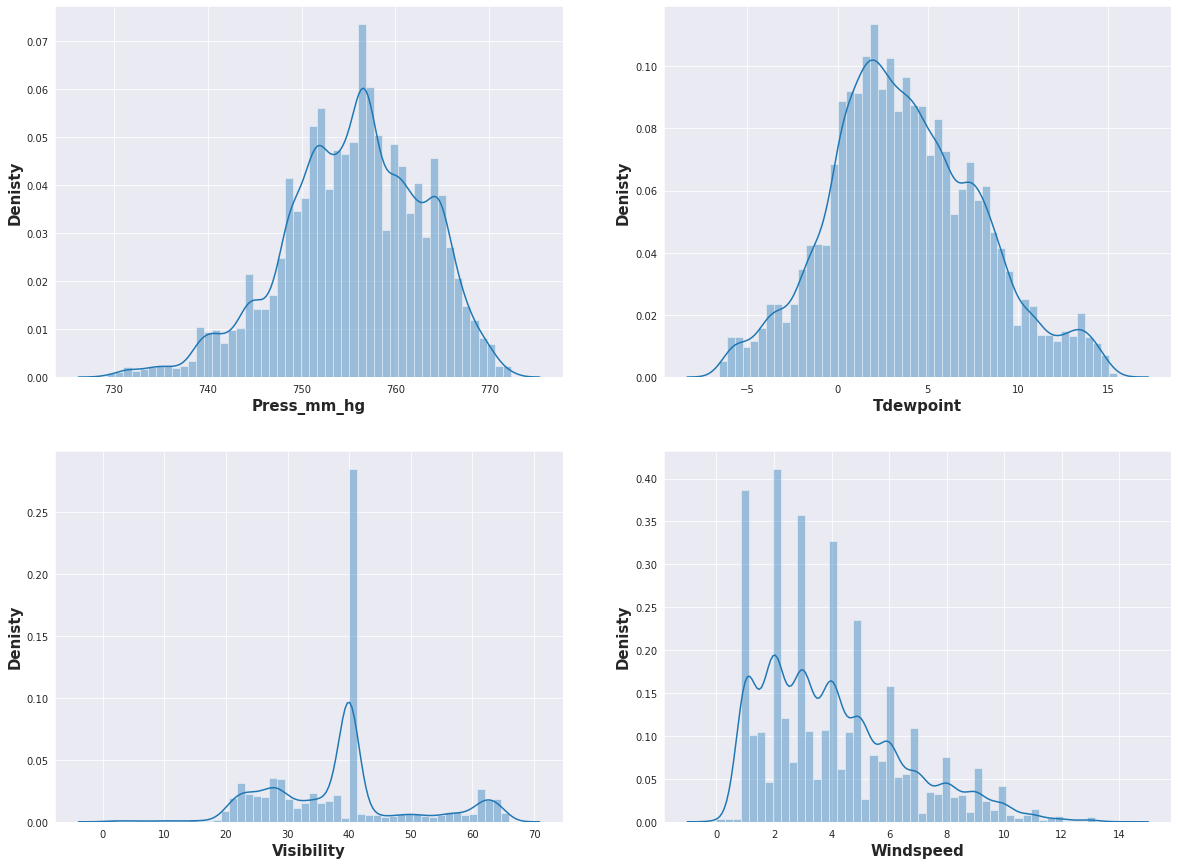

In [ ]:
# Let's create subplot of distribution plot for data from Chievres weather station df

Feature=Chievres_weather_station_df.columns.to_list()[2:]  # List of Chievres weather station df variables

axes=[]  # For axis
a=0      # No of rows

# Range for subplots 

while a < 2 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1

# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(2,2,figsize=(20,15))

plt.xlabel(Feature[i], fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('Density', fontsize=15,fontdict={"weight": "bold"})

for i in range (4):
  ax1=sns.distplot(Chievres_weather_station_df[Feature[i]],ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Denisty',size=15,fontdict={"weight": "bold"})

In [ ]:
Chievres_weather_station_df.describe()

T_out        RH_out   Press_mm_hg     Tdewpoint    Visibility  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.411665     79.750418    755.522602      3.760707     38.330834   
std        5.317409     14.901088      7.399441      4.194648     11.794719   
min       -5.000000     24.000000    729.300000     -6.600000      1.000000   
25%        3.666667     70.333333    750.933333      0.900000     29.000000   
50%        6.916667     83.666667    756.100000      3.433333     40.000000   
75%       10.408333     91.666667    760.933333      6.566667     40.000000   
max       26.100000    100.000000    772.300000     15.500000     66.000000   

          Windspeed  
count  19735.000000  
mean       4.039752  
std        2.451221  
min        0.000000  
25%        2.000000  
50%        3.666667  
75%        5.500000  
max       14.000000

**Pressure** :- Atmospheric pressure is an indicator of weather. When a low-pressure system moves into an area, it usually leads to cloudiness, wind, and precipitation. High-pressure systems usually lead to fair, calm weather.

Average atmospheric pressure is 755.52 mm, which is ideal by any standards.

---



**Dew point Temperature** :- By defination the dew point is the temperature below which the water vapour in a volume of air at a constant pressure will condense into liquid water. It is the temperature at which the air is saturated with moisture.

The lower dew point temperature means air is dry and cold in the atmosphere,which is also indicated by the atmospheric temperatures.


---


**Visibility** :- Visibility is the distance you can see as determined by light and weather conditions. Weather conditions that affect visibility are fog, mist and smog.

We can conclude that visibility is very good in the area since 75% of the data falls between 29km and 66km visibilty.


---


**Windspeed**:- There is mostly a light and gentle breeze in the area as 75% of the wind speed data falls within the 0 m/s to 5.5 m/s range.


---



# **Realtionship Between The Energy Consumption & Variables.**

**We have 4.5 months data and dates are in 'Date-Time' format.For computational purpose we will create few new columns for Day,Time,Month,Date,Hour.**

In [ ]:
# Importing Date-Time Library
from datetime import datetime

In [ ]:
# Changing Date to Date-Time format
appliances_energy_df['Date_Time']=appliances_energy_df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))

# Creating column with Year-Month-Day format
appliances_energy_df['Date']=appliances_energy_df['Date_Time'].apply(lambda x: datetime.strftime(x,'%Y-%m-%d'))

# Creating column for month number
appliances_energy_df['Month']=appliances_energy_df['Date_Time'].apply(lambda x:datetime.strftime(x,'%m'))

# Creating column for day of week
appliances_energy_df['Day']=appliances_energy_df['Date_Time'].apply(lambda x:datetime.strftime(x,'%A'))

# Creating column for hour of day (24 hrs in a day)
appliances_energy_df['Hour']=appliances_energy_df['Date_Time'].apply(lambda x:datetime.strftime(x,'%H'))

# Dropping unneccessary columns
appliances_energy_df.drop(['date','Date_Time'],inplace=True,axis=1)

In [ ]:
# let's display new Data frame
appliances_energy_df.head()

Consumption     T1       RH_1    T2       RH_2     T3       RH_3  \
0           60  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1           60  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2           50  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3           50  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4           60  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4         T5  ...  RH_out  Windspeed  Visibility  \
0  19.000000  45.566667  17.166667  ...    92.0   7.000000   63.000000   
1  19.000000  45.992500  17.166667  ...    92.0   6.666667   59.166667   
2  18.926667  45.890000  17.166667  ...    92.0   6.333333   55.333333   
3  18.890000  45.723333  17.166667  ...    92.0   6.000000   51.500000   
4  18.890000  45.530000  17.200000  ...    92.0   5.666667   47.666667   

   Tdewpoint   Avg_Temp  Avg_Humidity        Date  Month     Day  Hour  
0        5.3  18.435000     46.742500  2016-01-11     01  Monday    17  
1        5.2  18.439167     46.672708  2016-01-11     01  Monday    17  
2        5.1  18.421667     46.562917  2016-01-11     01  Monday    17  
3        5.0  18.396250     46.468750  2016-01-11     01  Monday    17  
4        4.9  18.408750     46.462917  2016-01-11     01  Monday    17  

[5 rows x 31 columns]

# ***PLOTTING ENERGY CONSUMPTION OVERTIME***

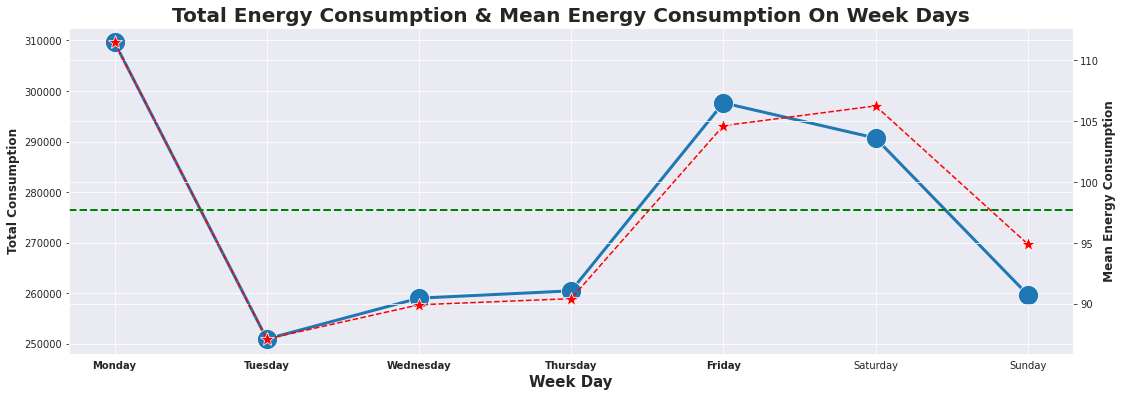

In [ ]:
# TOTAL AND MEAN MEAN ENERGY CONSUMPTION ACCORDING TO DAY OF WEEK

sns.set_style('darkgrid')

fig,axis1=plt.subplots(figsize=(18,6))
axis1=sns.lineplot(x=appliances_energy_df.Day,y=appliances_energy_df.Consumption,marker='o',ci=None,
             linewidth=3,markersize=20,estimator=np.sum)
axis1.set_title( 'Total Energy Consumption & Mean Energy Consumption On Week Days',
                fontsize=20,fontdict={"weight": "bold"})
axis1.set_xlabel('Week Day', fontsize=15,fontdict={"weight": "bold"})
axis1.set_ylabel(' Total Consumption ', fontsize=12,fontdict={"weight": "bold"})
axis1.set_xticklabels('Lable',fontsize=10,fontdict={"weight": "bold"})

##-------------------------------------------------------------------------------------------------##
# Specifying The Same Axis
axis2= axis1.twinx()
##-------------------------------------------------------------------------------------------------##
axis2=sns.lineplot(x=appliances_energy_df.Day,y=appliances_energy_df.Consumption,ci=None,
                 color='red',linestyle='dashed', marker='*', markerfacecolor='red', markersize=15)
axis2.set_ylabel(' Mean Energy Consumption ', fontsize=12,fontdict={"weight": "bold"})
#---------------------------------------------------------------------------------------------------#
axis2.axhline(appliances_energy_df.Consumption.mean(),color='green',linestyle='dashed',linewidth='2')

1.The above plot clearly illustrates the differences in energy consumption 
on a daily basis.

2.Monday has the highest total energy consumption as well as the highest mean energy consumption.

3.Tuesday has the lowest total energy consumption as well as the lowest mean energy consumption..

4.Tuesday, Wednesday, Thursday, and Friday have a mean energy consumption below overall mean consumption and Monday, Friday, and Saturday have a mean energy consumption over overall mean consumption.

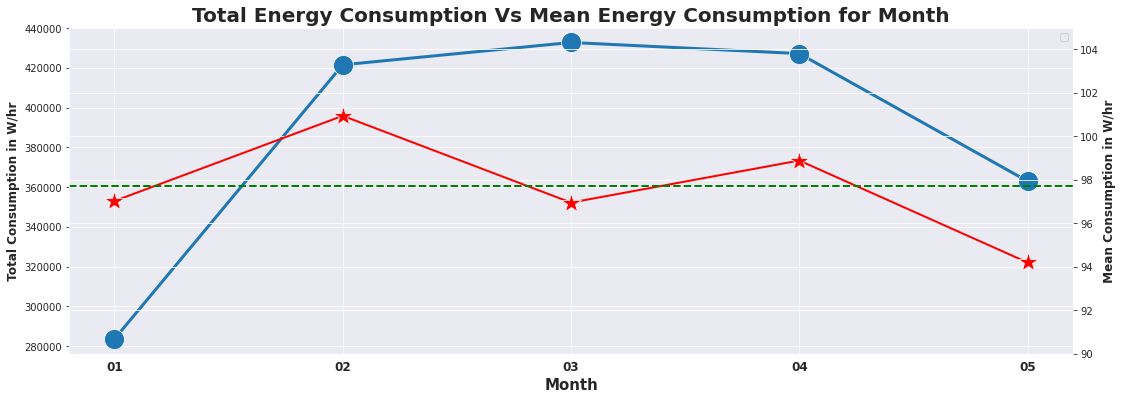

In [ ]:
# ENERGY CONSUMPTION & AVERAGE ENERGY CONSUMPTION PER MONTH 
sns.set_style('darkgrid')

plt.figure(figsize=(18,6))
axis1=sns.lineplot(x=appliances_energy_df.Month,y=appliances_energy_df.Consumption,marker='o',ci=None,
             linewidth=3,markersize=20,estimator=np.sum)
axis1.set_title( 'Total Energy Consumption Vs Mean Energy Consumption for Month',
                fontsize=20,fontdict={"weight": "bold"})
axis1.set_xlabel('Month', fontsize=15,fontdict={"weight": "bold"})
axis1.set_ylabel(' Total Consumption in W/hr ', fontsize=12,fontdict={"weight": "bold"})
axis1.set_xticklabels(axis1.get_xticklabels(),size=12,fontdict={"weight": "bold"})
##-------------------------------------------------------------------------------------------------##
# Specifying The Same Axis
axis2 = axis1.twinx()
##-------------------------------------------------------------------------------------------------##
axis2=sns.lineplot(x=appliances_energy_df.Month,y=appliances_energy_df.Consumption,marker='*',ci=None,
             linewidth=2,markersize=20,color='red',dashes=True)
axis2.set_ylabel(' Mean Consumption in W/hr ', fontsize=12,fontdict={"weight": "bold"})
axis2.set_ylim([90,105])
#--------------------------------------------------------------------------------------------------#
axis2.axhline(appliances_energy_df.Consumption.mean(),color='green',linestyle='dashed',linewidth='2')

plt.legend()
plt.show()

In [ ]:
print(f"We have data from Date: {appliances_energy_df['Date'].min()} to Date: {appliances_energy_df['Date'].max()} ")

We have data from Date: 2016-01-11 to Date: 2016-05-27 


*   **Starting from the 11th of January through the 27th of May, we have 5 months of data.**

*   **The number of days varied from month to month, therefore, the amount of energy consumed varied widely. February had the highest average of 101 watts per hour, while May had the lowest average of 94 watts per hour.**



---


---



⬛ Energy consumption according to the Hours in the day.


---


---



⚫ Let's explore other features over time.

In [ ]:
# Temperature features according to the Hour
hourly_temp_df=appliances_energy_df.groupby(['Hour'])['Consumption', 'T1','T2','T3', 'T4','T5','T6',
                                'T7','T8','T9','T_out','Avg_Temp'].mean().reset_index()

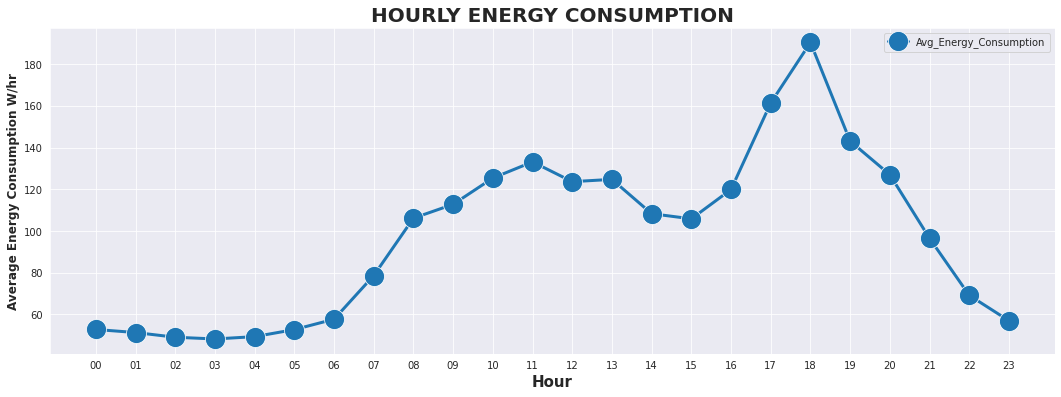

In [ ]:
# ENERGY CONSUMPTION & AVERAGE ENERGY CONSUMPTION PER HOUR 
sns.set_style('darkgrid')
plt.figure(figsize=(18,6))
sns.lineplot(x=hourly_temp_df.Hour,y=hourly_temp_df.Consumption,marker='o',ci=None,
             linewidth=3,markersize=20,legend='brief',label='Avg_Energy_Consumption')
plt.title( 'HOURLY ENERGY CONSUMPTION',fontsize=20,fontdict={"weight": "bold"})
plt.xlabel('Hour', fontsize=15,fontdict={"weight": "bold"})
plt.ylabel('Average Energy Consumption W/hr', fontsize=12,fontdict={"weight": "bold"})
plt.legend()
plt.show()


*   **It is obvious from the graph that energy consumption varies with the time of day.**
*   **The consumption of energy from late night to early morning is very low. This is because appliances are used less during the night**
*   **The consumption of energy from morning until evening is moderate.**
*   **In the evening, energy consumption is highest.This is because appliances are used more during the evening.**




In [ ]:
hourly_temp_df

Hour  Consumption         T1         T2         T3         T4         T5  \
0    00    52.785888  21.984336  20.071736  22.264619  21.063244  19.773448   
1    01    51.326034  21.808582  19.819235  22.267202  20.914659  19.669697   
2    02    49.075426  21.648167  19.597539  22.280853  20.757661  19.584937   
3    03    48.236010  21.497259  19.403972  22.281183  20.616136  19.514343   
4    04    49.355231  21.359599  19.231141  22.268101  20.497575  19.452120   
5    05    52.737226  21.238172  19.079161  22.230471  20.395547  19.398241   
6    06    57.712895  21.145559  18.979968  22.154772  20.308784  19.361282   
7    07    78.649635  21.074625  18.984885  22.085462  20.267484  19.356990   
8    08   106.143552  21.045174  19.419363  22.017272  20.390519  19.360290   
9    09   112.785888  21.062342  20.129343  21.972464  20.641993  19.382910   
10   10   125.377129  21.131716  20.734925  21.954526  20.833247  19.434725   
11   11   133.126521  21.245400  21.048057  22.063100  20.971180  19.433021   
12   12   123.637470  21.419656  21.166696  22.234159  21.045046  19.438146   
13   13   124.744526  21.632526  21.213473  22.332005  21.052235  19.446664   
14   14   108.284672  21.797301  21.213783  22.393777  21.077734  19.458837   
15   15   105.827251  21.922897  21.209705  22.395606  21.094236  19.498147   
16   16   119.902676  21.988784  21.159579  22.425709  21.079169  19.539011   
17   17   161.352657  21.997294  21.036274  22.405707  21.038431  19.585355   
18   18   190.364520  22.063392  20.928900  22.412573  21.013790  19.625775   
19   19   143.065693  22.239580  20.949068  22.480641  20.960720  19.743658   
20   20   126.982968  22.344471  20.940599  22.454369  21.043971  20.007391   
21   21    96.496350  22.373094  20.854341  22.410355  21.177825  20.177135   
22   22    69.148418  22.300952  20.650391  22.356174  21.149653  20.068961   
23   23    56.982968  22.154110  20.361347  22.280379  21.135665  19.899474   

           T6         T7         T8         T9      T_out   Avg_Temp  
0    5.802623  20.263099  22.379672  19.414779   6.072972  20.901867  
1    5.572878  20.237877  22.237671  19.433406   5.792174  20.798541  
2    5.305511  20.213718  22.111171  19.450984   5.556792  20.705629  
3    5.083243  20.186803  22.005521  19.462287   5.299311  20.620938  
4    4.904634  20.153959  21.904606  19.474698   5.047476  20.542725  
5    4.800352  20.119793  21.807153  19.479062   4.889751  20.468450  
6    4.893600  20.090291  21.708113  19.480995   4.836766  20.403720  
7    5.396624  20.046490  21.600129  19.475854   5.034693  20.361490  
8    6.601784  19.970626  21.471036  19.526685   5.649926  20.400121  
9    7.875578  19.914661  21.366458  19.551915   6.587756  20.502761  
10   9.069138  19.905016  21.321914  19.516885   7.628902  20.604119  
11  10.091602  19.956039  21.362568  19.521214   8.571446  20.700072  
12  10.896795  20.108890  21.507263  19.530468   9.296928  20.806290  
13  11.494971  20.296161  21.723264  19.542765   9.845134  20.904887  
14  11.777585  20.491738  21.923773  19.572848  10.228315  20.991224  
15  11.856595  20.674297  22.119585  19.585540  10.400365  21.062502  
16  11.604783  20.750290  22.276342  19.591808  10.290166  21.101337  
17  10.970687  20.679623  22.367765  19.553147   9.972122  21.082950  
18   9.955214  20.567439  22.486762  19.496510   9.425111  21.074392  
19   8.911678  20.466621  22.575670  19.453627   8.777068  21.108698  
20   7.663148  20.387393  22.646766  19.406496   8.058029  21.153932  
21   6.846246  20.336761  22.653344  19.364831   7.351399  21.168461  
22   6.386955  20.300544  22.612192  19.372215   6.827616  21.101385  
23   6.075499  20.289049  22.526795  19.400355   6.418593  21.005897

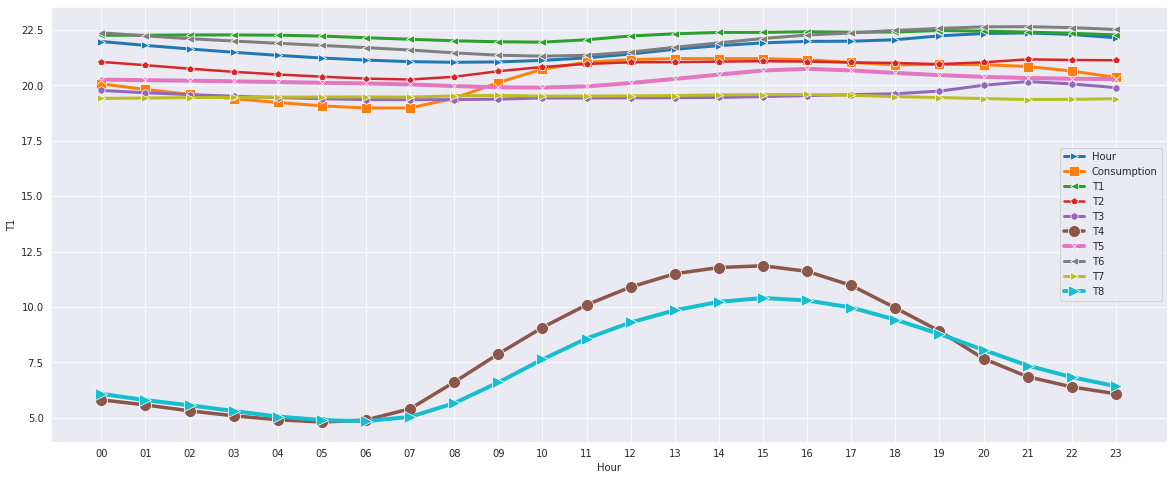

In [ ]:
# TEMPERATURE FEATURES OVER THE DAY HOURS

plt.figure(figsize=(20,8))

# Defining different Marker,Linewidth,Marker Sizes 
markers=['>','s','<','p','h','o','x','<','>','>','d']
linewidths=[3,3,3,2.5,3,3.5,4,3,3,4,3]
markersizes=[8,10,8,8,8,12,8,8,8,12,8]
# List of  features
Features=hourly_temp_df.columns.to_list()[2:]

# For loop
for i in range(10) :
  ax=sns.lineplot(x=hourly_temp_df.Hour,y=hourly_temp_df[Features[i]],marker=markers[i],
               linewidth=linewidths[i],markersize=markersizes[i],legend='brief')
  
ax.legend(ax.get_lines(), hourly_temp_df.columns, loc='best')
plt.show()

In [ ]:
hourly_humidity_df=appliances_energy_df.groupby(['Hour'])['RH_1','RH_2','RH_3','RH_4','RH_5','RH_6','RH_7',
                                                        'RH_8','RH_9','RH_out','Avg_Humidity'].mean().reset_index()    

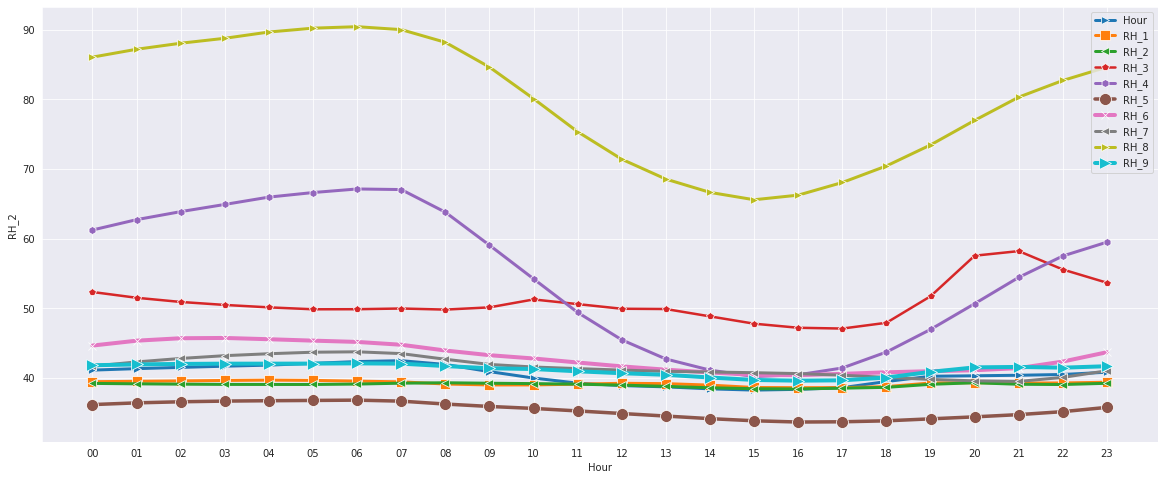

In [ ]:
plt.figure(figsize=(20,8))
markers=['>','s','<','p','h','o','x','<','>','>','d']
linewidths=[3,3,3,2.5,3,3.5,4,3,3,4,3]
markersizes=[8,10,8,8,8,12,8,8,8,12,8]
Features=hourly_humidity_df.columns.to_list()[2:]
for i in range(10) :
  ax=sns.lineplot(x=hourly_humidity_df.Hour,y=hourly_humidity_df[Features[i]],marker=markers[i],
               linewidth=linewidths[i],markersize=markersizes[i],legend='brief')
  
ax.legend(ax.get_lines(), hourly_humidity_df.columns, loc='best')

In [ ]:
hourly_outside_weather=appliances_energy_df.groupby(['Hour'])['Press_mm_hg','Windspeed','Visibility',
                                                              'Tdewpoint'].mean().reset_index()

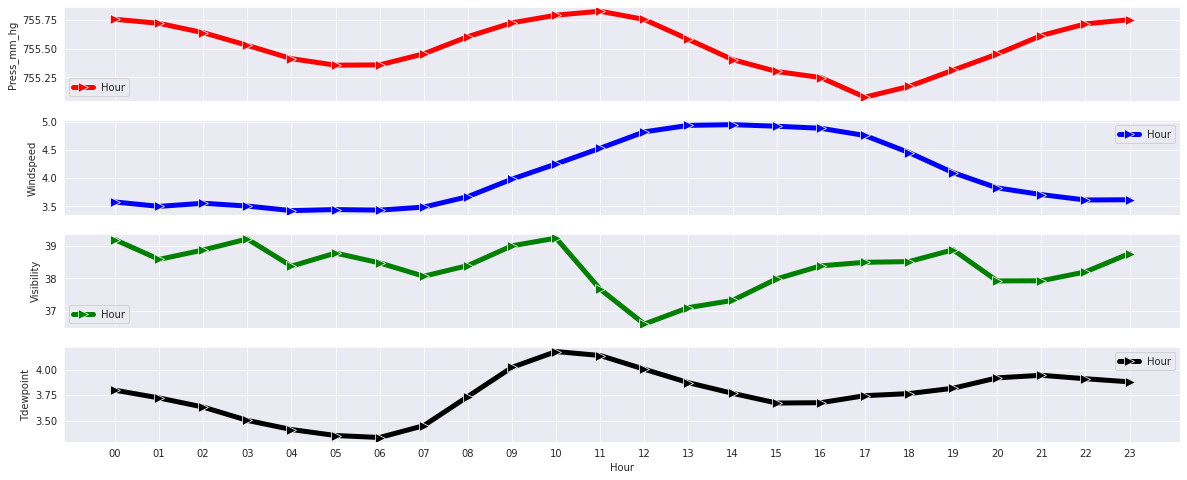

In [ ]:
Feature=hourly_outside_weather.columns.to_list()[1:]
fig, ax = plt.subplots(4,1, sharex=True,figsize=(20,8))
colors=['red','blue','green','black']
for i in range(4):
  axisss=sns.lineplot(x=hourly_outside_weather.Hour,y=hourly_outside_weather[Feature[i]],ax=ax[i],
               marker='>',linewidth=5,markersize=10,color=colors[i])
  axisss.legend(axisss.get_lines(), hourly_outside_weather.columns, loc='best')

# **OTHER FEATURES AND ENERGY CONSUMPTION**

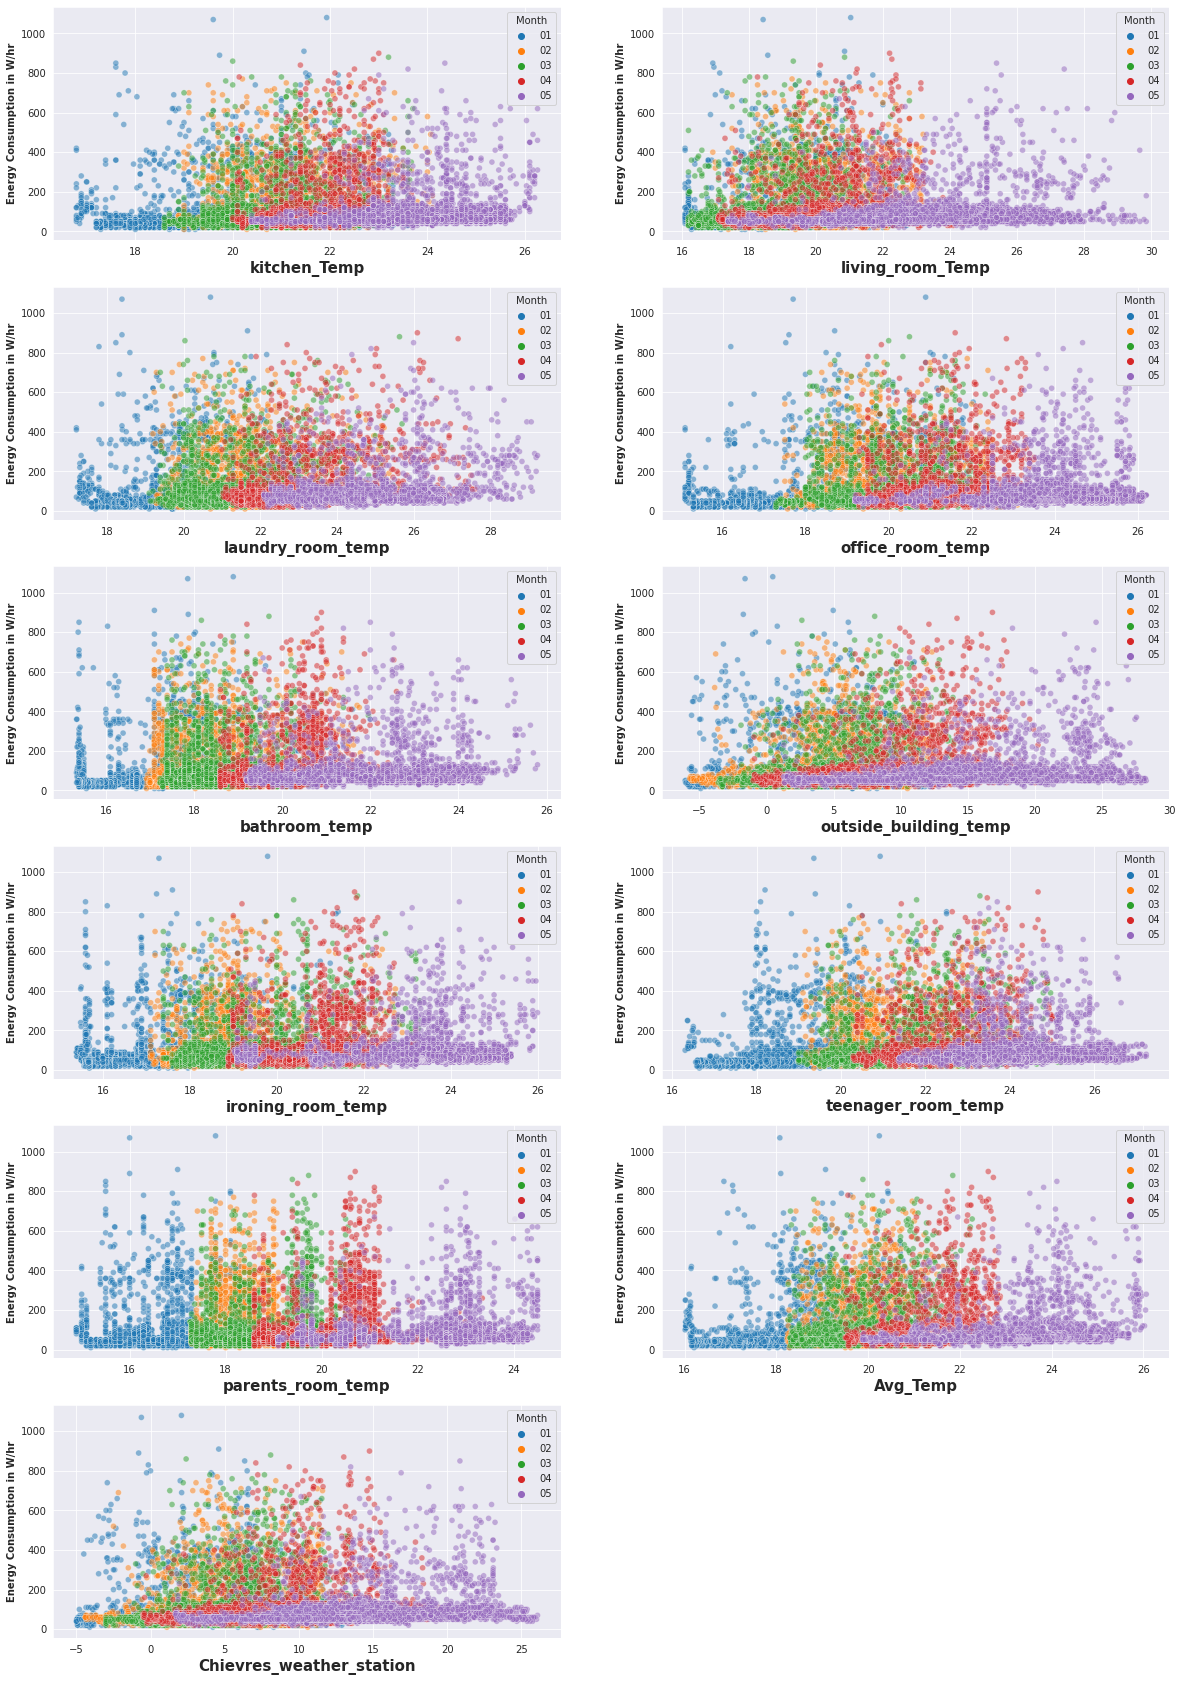

In [ ]:
#Let's create subplots for Month wise Energy Consumption and Humidity
Feature=Temperature_df.columns.to_list()  # List of all Humidity variables
axes=[]  # For axis
a=0      # No of rows
# Range for subplots 
while a < 6 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1
# Plot for Subplots
figure,axis=plt.subplots(6,2,figsize=(20,30))
for i in range (11):
  ax1=sns.scatterplot(x=Temperature_df[Feature[i]],y=appliances_energy_df['Consumption'],
                      hue=appliances_energy_df.Month,alpha=0.5,ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Energy Consumption in W/hr',size=10,fontdict={"weight": "bold"})
figure.delaxes(axis[5,1])

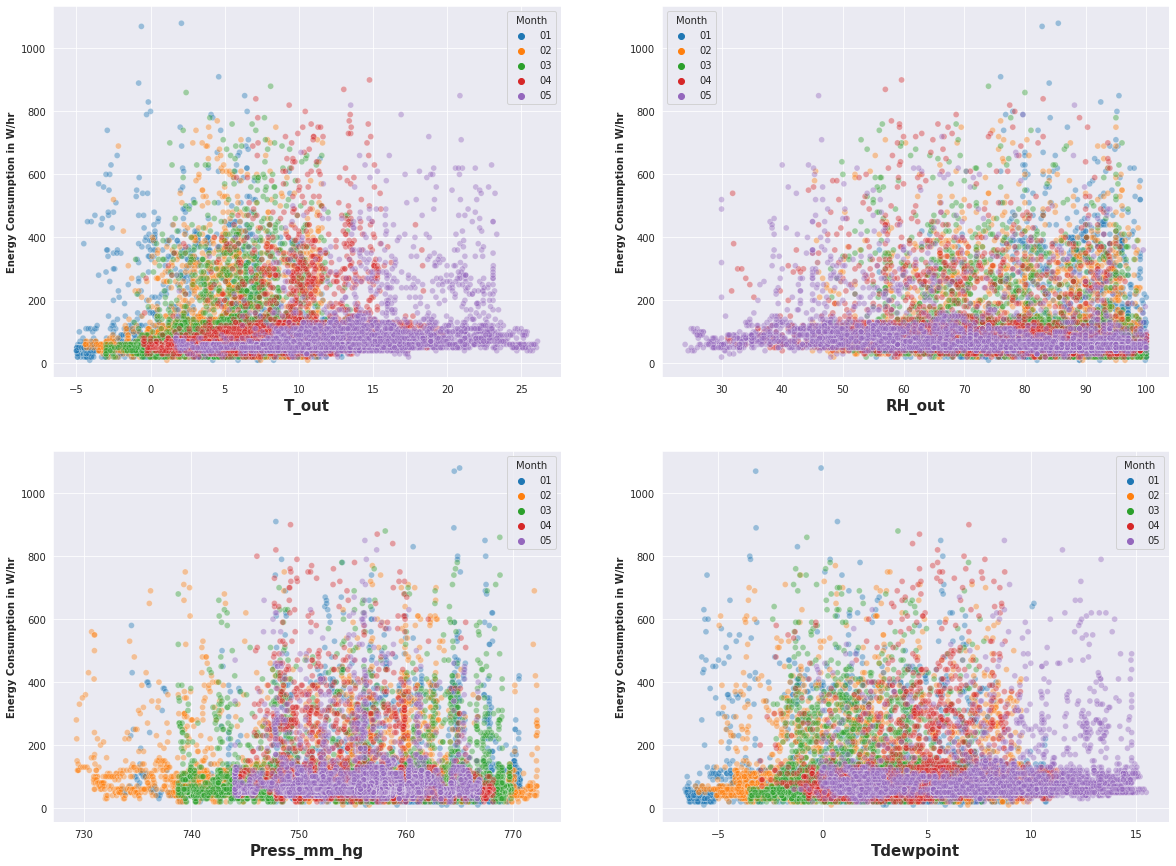

In [ ]:
# Let's create subplots for Month wise Energy Consumption and Temperature
Feature=Chievres_weather_station_df.columns.to_list()  # List of all features
axes=[]  # For axis
a=0      # No of rows
# Range for subplots 
while a < 2 :
  for i in range(2):  # No. of column
    axes.append((a,i))
  a+=1
# Plot for Subplots
sns.set_style('darkgrid')
figure,axis=plt.subplots(2,2,figsize=(20,15))
for i in range (4):
  ax1=sns.scatterplot(x=Chievres_weather_station_df[Feature[i]],y=appliances_energy_df['Consumption'],
                      hue=appliances_energy_df.Month,alpha=0.4,ax=axis[axes[i][0],axes[i][1]])
  ax1.set_xlabel(Feature[i],size=15,fontdict={"weight": "bold"})
  ax1.set_ylabel('Energy Consumption in W/hr',size=10,fontdict={"weight": "bold"})


In [ ]:
# Using Plotly library plotting daily Energy consumption
fig = px.line(appliances_energy_df, x='Date', y='Consumption')
fig.show()

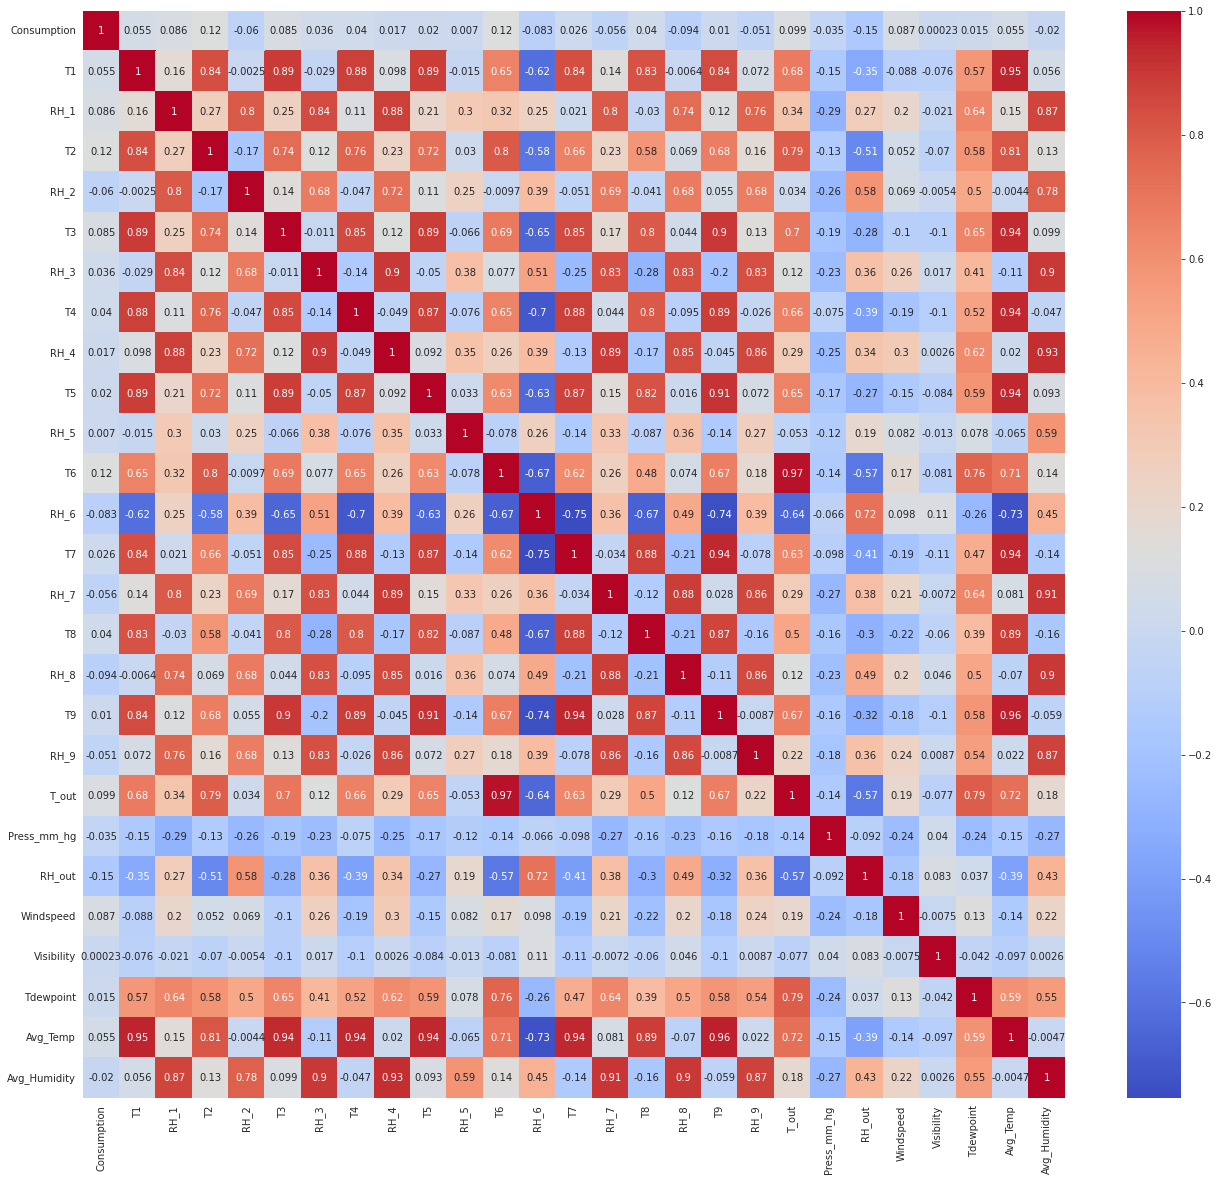

In [ ]:
# CORRELATION PLOT FOR ALL THE VARIABLES
plt.figure(figsize=(22,20))
sns.heatmap(appliances_energy_df.corr(),annot=True,cmap='coolwarm')

# **OUTLIERS DETECTION**

In [ ]:
appliances_energy_df['Consumption'].describe()

count    19735.000000
mean        97.694958
std        102.524891
min         10.000000
25%         50.000000
50%         60.000000
75%        100.000000
max       1080.000000
Name: Consumption, dtype: float64



---
**Data is too much positively skewed as 25% values at higher side are fall between the 100 and 1080 and other 75% fall between the 10 and 100.**

**It also indiacates that at higher side data have the lots of outliers.**


---
**Outliers detection based on z_score.**


In [ ]:
# Let's find out the z_score for the Energy consumption column
z_score=abs(stats.zscore(appliances_energy_df['Consumption']))

# Let's create new column for z_score 
appliances_energy_df['z_score']=abs(stats.zscore(appliances_energy_df['Consumption']))

In [ ]:
# Creating a new data frame based on z_score for removing outliers
New_Appliances_z_score=appliances_energy_df[appliances_energy_df['z_score'] <= 3]

# Data frame only with outliers based on the z_score for removing outliers
outliers_df_z_score=appliances_energy_df[appliances_energy_df['z_score'] > 3]

In [ ]:
# Description of data frame with outliers
New_Appliances_z_score['Consumption'].describe().apply(lambda x: format(x,'.2f'))

count    19195.00
mean        85.08
std         67.83
min         10.00
25%         50.00
50%         60.00
75%         90.00
max        400.00
Name: Consumption, dtype: object

In [ ]:
# Description of data frame without outliers based on IQR
outliers_df_z_score['Consumption'].describe().apply(lambda x: format(x,'.2f'))

count     540.00
mean      545.98
std       118.44
min       410.00
25%       450.00
50%       510.00
75%       620.00
max      1080.00
Name: Consumption, dtype: object

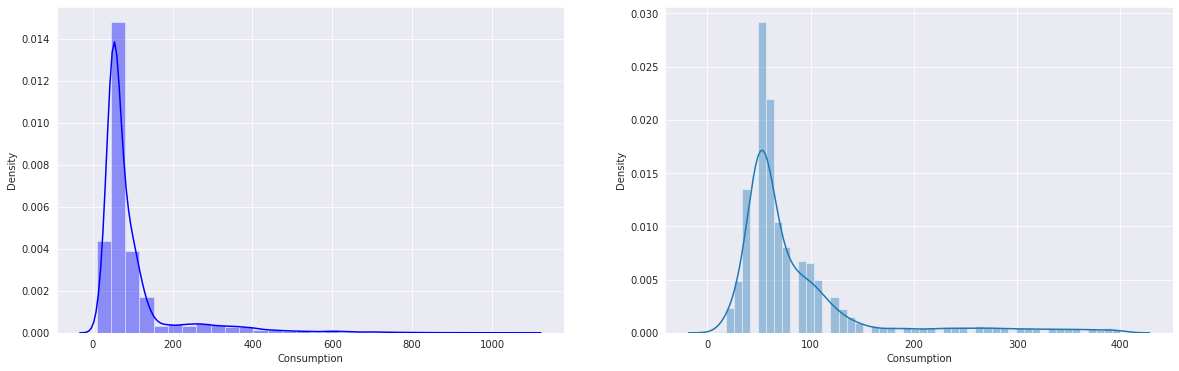

In [ ]:
# Let's feature Consumption before and after outliers removal

plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

# Distribution of Energy Consumption
plt.subplot(1,2,1)
sns.distplot(appliances_energy_df.Consumption,bins=30,color='Blue')

# Box plot for Energy Consumption
plt.subplot(1,2,2)
sns.distplot(New_Appliances_z_score.Consumption)

In [ ]:
print(f"Data shape before outlier removal {appliances_energy_df.shape} and after outliers removal {New_Appliances_z_score.shape}.")

Data shape before outlier removal (19735, 32) and after outliers removal (19195, 32).


**Outliers Detection based upon IQR.**

In [ ]:
# IQR = 75% Percentile - 25% Percentile
IQR=(appliances_energy_df['Consumption'].quantile(0.75)) -(appliances_energy_df['Consumption'].quantile(0.25))

print("The IQR for Consumption is : ",IQR)

The IQR for Consumption is :  50.0


In [ ]:
# The upper limit 
upper_limit=(appliances_energy_df['Consumption'].quantile(0.75) + (1.5 * (IQR)))
# The Lower limit 
lower_limit=abs(appliances_energy_df['Consumption'].quantile(0.25) - (1.5 * (IQR)))

print(f"The upper limit is : {upper_limit} and lower limit is : {lower_limit}")

The upper limit is : 175.0 and lower limit is : 25.0


In [ ]:
# New data frame after removing outliers based on the IQR
Appliances_df_IQR=appliances_energy_df[(appliances_energy_df['Consumption'] >= lower_limit) & (appliances_energy_df['Consumption'] <= upper_limit)]

# Data frame only with outliers based on the IQR
outliers_df_IQR=appliances_energy_df[(appliances_energy_df['Consumption'] <= lower_limit) | (appliances_energy_df['Consumption'] >= upper_limit)]

In [ ]:
# Description of data frame with outliers
outliers_df_IQR['Consumption'].describe().apply(lambda x: format(x,'.2f'))

count    2490.00
mean      302.12
std       173.46
min        10.00
25%       210.00
50%       290.00
75%       390.00
max      1080.00
Name: Consumption, dtype: object

In [ ]:
# Description of data frame without outliers based on IQR
Appliances_df_IQR['Consumption'].describe().apply(lambda x: format(x,'.2f'))

count    17245.00
mean        68.18
std         27.94
min         30.00
25%         50.00
50%         60.00
75%         80.00
max        170.00
Name: Consumption, dtype: object

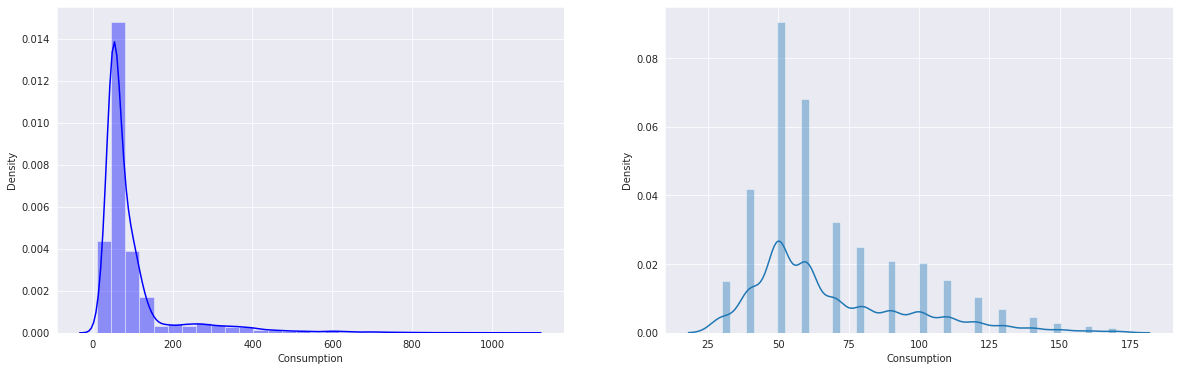

In [ ]:
# Let's feature Consumption before and after outliers removal

plt.figure(figsize=(20,6))
sns.set_style('darkgrid')

# Distribution of Energy Consumption
plt.subplot(1,2,1)
sns.distplot(appliances_energy_df.Consumption,bins=30,color='Blue')

# Box plot for Energy Consumption
plt.subplot(1,2,2)
sns.distplot(Appliances_df_IQR.Consumption)

In [ ]:
print(f"Data shape before outlier removal {appliances_energy_df.shape} and after outliers removal {Appliances_df_IQR.shape}.")

Data shape before outlier removal (19735, 32) and after outliers removal (17245, 32).


**We can conclude after observing both the outliers detection technique that using IQR we can remove most of the outliers from the data.**

**So,for further processes we will use "Appliances_df_IQR" data frame.**

# **LABLE ENCODING AND ONE HOT CODING**

**⚫Transformation for the day of week.**

In [ ]:
# Dictionary of  week days with numerical values as per the importance based on the avergae consumption
week_days={'Tuesday':0,'Wednesday':0,'Thursday':0,'Sunday':0,'Friday':1,'Saturday':1,'Monday':2}

In [ ]:
# Replacing week days with numerical values as per the importance based on the avergae consumption
Appliances_df_IQR['Day'].replace(week_days,inplace=True)

**⚫Transformation for the Hour of Day.**

In [ ]:
# Changing the data type from string to Numeric
Appliances_df_IQR['Hour']=Appliances_df_IQR['Hour'].astype('int')

In [ ]:
# Creating a function Encoding to replace hourly values into lables as per energy consumption
def encoding(i):
    if (i >= 21) or (i <= 6): # Late night to Early morning
      return 0
    if (i > 6) and (i < 16):  # Morning to Evening
      return 1
    else:
      return 2                # Evening

In [ ]:
# Applying Encoding function to the Feature Hour
Appliances_df_IQR['Hour']=Appliances_df_IQR['Hour'].apply(encoding)

In [ ]:
# Checking the transformation
Appliances_df_IQR['Hour'].value_counts()

0    7913
1    6076
2    3256
Name: Hour, dtype: int64

**⚫Transformation for the Month.**

In [ ]:
month_dict={'01':1,'03':1,'04':1,'02':2,'05':0}

In [ ]:
# Replacing Month with numerical values as per the importance based on the avergae consumption
Appliances_df_IQR['Month'].replace(month_dict,inplace=True)

In [ ]:
Appliances_df_IQR.head()

Consumption     T1       RH_1    T2       RH_2     T3       RH_3  \
0           60  19.89  47.596667  19.2  44.790000  19.79  44.730000   
1           60  19.89  46.693333  19.2  44.722500  19.79  44.790000   
2           50  19.89  46.300000  19.2  44.626667  19.79  44.933333   
3           50  19.89  46.066667  19.2  44.590000  19.79  45.000000   
4           60  19.89  46.333333  19.2  44.530000  19.79  45.000000   

          T4       RH_4         T5  ...  Windspeed  Visibility  Tdewpoint  \
0  19.000000  45.566667  17.166667  ...   7.000000   63.000000        5.3   
1  19.000000  45.992500  17.166667  ...   6.666667   59.166667        5.2   
2  18.926667  45.890000  17.166667  ...   6.333333   55.333333        5.1   
3  18.890000  45.723333  17.166667  ...   6.000000   51.500000        5.0   
4  18.890000  45.530000  17.200000  ...   5.666667   47.666667        4.9   

    Avg_Temp  Avg_Humidity        Date  Month  Day  Hour   z_score  
0  18.435000     46.742500  2016-01-11      1    2     2  0.367676  
1  18.439167     46.672708  2016-01-11      1    2     2  0.367676  
2  18.421667     46.562917  2016-01-11      1    2     2  0.465215  
3  18.396250     46.468750  2016-01-11      1    2     2  0.465215  
4  18.408750     46.462917  2016-01-11      1    2     2  0.367676  

[5 rows x 32 columns]

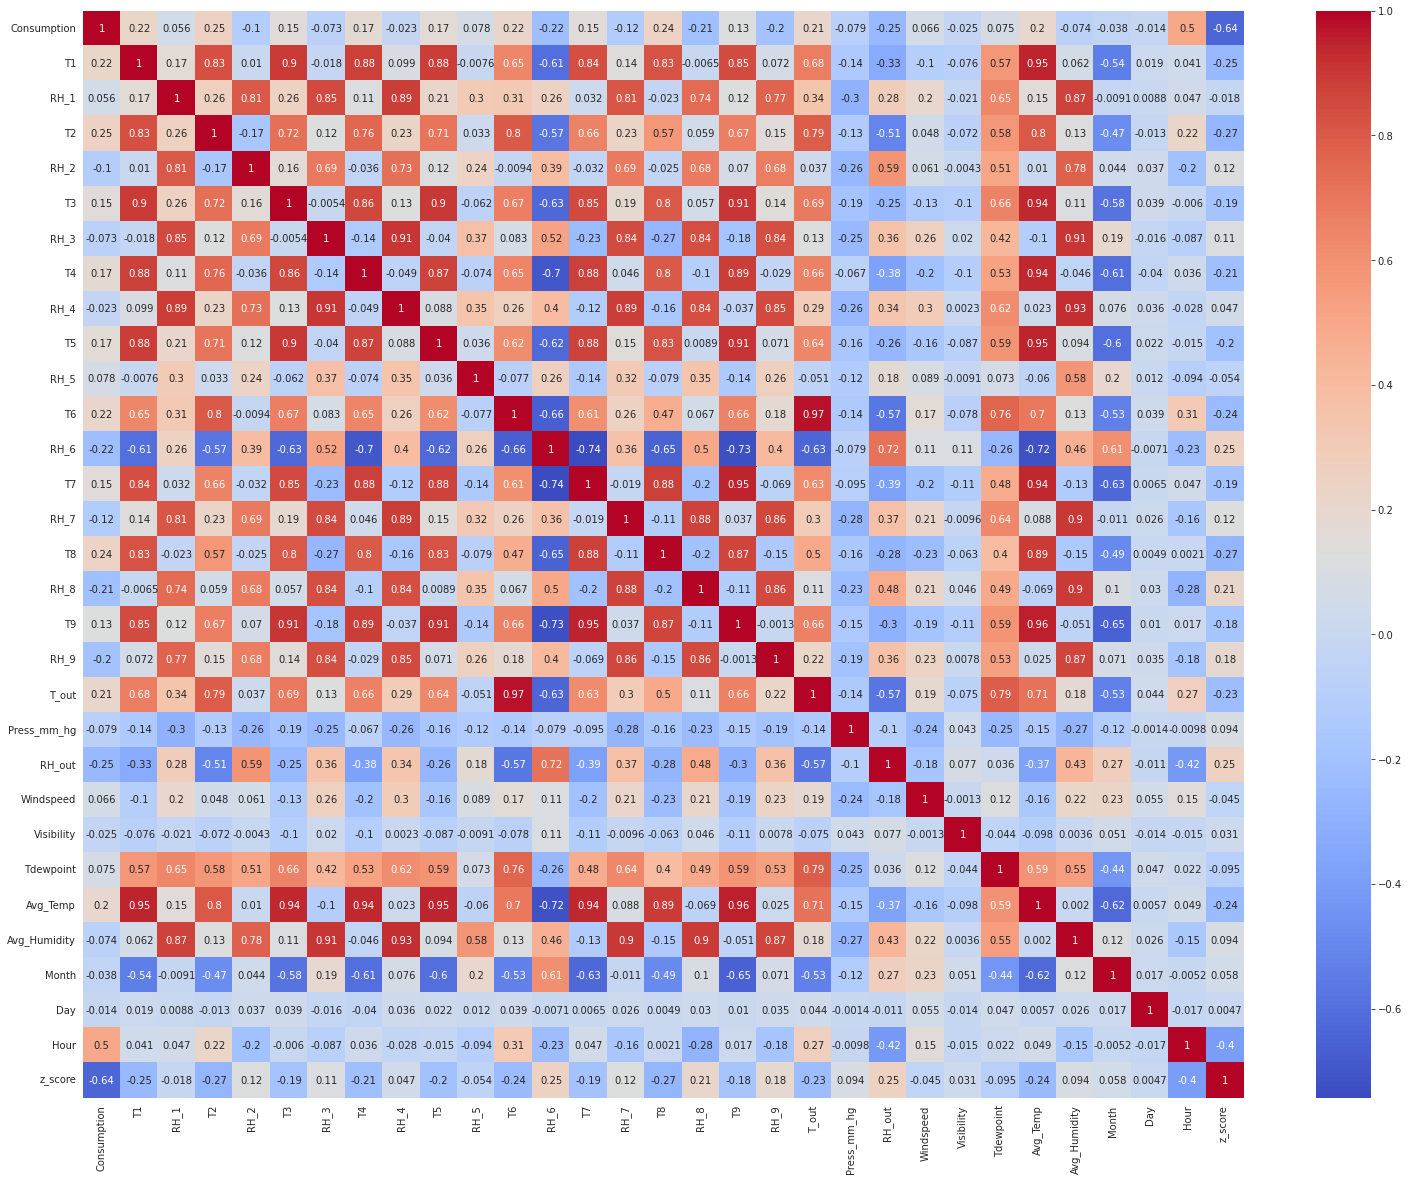

In [ ]:
# CORRELATION PLOT FOR ALL THE VARIABLES
plt.figure(figsize=(26,20))
sns.heatmap(Appliances_df_IQR.corr(),annot=True,cmap='coolwarm')

**⬛ DATA PRE-PROCESSING**

⚫ **Data destribution for dependable variable Consumption is positively skewed.**

**So,by using Log Transformation we will Normalize the data.**

In [ ]:
# Assigning 'y' to the dependable variable
y=Appliances_df_IQR['Consumption']

# Applying Log Transformation with base of 10.
y=np.log(y)

**⚫ INDEPENDENT VARIABLES**

In [ ]:
Appliances_df_IQR.columns

Index(['Consumption', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'Avg_Temp', 'Avg_Humidity', 'Date', 'Month', 'Day', 'Hour',
       'z_score'],
      dtype='object')

In [ ]:
# Dropping all the unnecessary features and assigning 'x' to the independant variables

X=Appliances_df_IQR.drop(['Consumption','Date','z_score'],axis=1)

In [ ]:
X.head(5)

T1       RH_1    T2       RH_2     T3       RH_3         T4       RH_4  \
0  19.89  47.596667  19.2  44.790000  19.79  44.730000  19.000000  45.566667   
1  19.89  46.693333  19.2  44.722500  19.79  44.790000  19.000000  45.992500   
2  19.89  46.300000  19.2  44.626667  19.79  44.933333  18.926667  45.890000   
3  19.89  46.066667  19.2  44.590000  19.79  45.000000  18.890000  45.723333   
4  19.89  46.333333  19.2  44.530000  19.79  45.000000  18.890000  45.530000   

          T5   RH_5  ...  Press_mm_hg  RH_out  Windspeed  Visibility  \
0  17.166667  55.20  ...        733.5    92.0   7.000000   63.000000   
1  17.166667  55.20  ...        733.6    92.0   6.666667   59.166667   
2  17.166667  55.09  ...        733.7    92.0   6.333333   55.333333   
3  17.166667  55.09  ...        733.8    92.0   6.000000   51.500000   
4  17.200000  55.09  ...        733.9    92.0   5.666667   47.666667   

   Tdewpoint   Avg_Temp  Avg_Humidity  Month  Day  Hour  
0        5.3  18.435000     46.742500      1    2     2  
1        5.2  18.439167     46.672708      1    2     2  
2        5.1  18.421667     46.562917      1    2     2  
3        5.0  18.396250     46.468750      1    2     2  
4        4.9  18.408750     46.462917      1    2     2  

[5 rows x 29 columns]

**⚫ SPLITTING THE DATA INTO TEST AND TRAIN**

In [ ]:
X.isin([np.inf]).sum()

T1              0
RH_1            0
T2              0
RH_2            0
T3              0
RH_3            0
T4              0
RH_4            0
T5              0
RH_5            0
T6              0
RH_6            0
T7              0
RH_7            0
T8              0
RH_8            0
T9              0
RH_9            0
T_out           0
Press_mm_hg     0
RH_out          0
Windspeed       0
Visibility      0
Tdewpoint       0
Avg_Temp        0
Avg_Humidity    0
Month           0
Day             0
Hour            0
dtype: int64

In [ ]:
X.isin([-np.inf]).sum()

T1              0
RH_1            0
T2              0
RH_2            0
T3              0
RH_3            0
T4              0
RH_4            0
T5              0
RH_5            0
T6              0
RH_6            0
T7              0
RH_7            0
T8              0
RH_8            0
T9              0
RH_9            0
T_out           0
Press_mm_hg     0
RH_out          0
Windspeed       0
Visibility      0
Tdewpoint       0
Avg_Temp        0
Avg_Humidity    0
Month           0
Day             0
Hour            0
dtype: int64

In [ ]:
# Splitting the data by 80-20
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=1)

In [ ]:
print(f"The shape of Training X values {X_train.shape}  and training y values {y_train.shape}")
print(f"The shape of testing X values {X_test.shape}  and testing y values {y_test.shape}")

The shape of Training X values (13796, 29)  and training y values (13796,)
The shape of testing X values (3449, 29)  and testing y values (3449,)


In [ ]:
# Importing standard scaler
scaler = StandardScaler()

# Scaling train data set
X_train = scaler.fit_transform(X_train)

# Scaling test data set
X_test = scaler.transform(X_test)

# **⬛ BASELINE MODELS**

In [ ]:
# Importing Linear Regression Model
lr = LinearRegression()
# Importing Linear Regression Lasso Model
lasso = Lasso(random_state=0)
# Importing Linear Regression Ridge Model
ridge = Ridge(random_state=0)
# Importing KN Regression Model
knn = neighbors.KNeighborsRegressor()
# Importing SVR Model
svm = SVR(kernel='rbf')
# Importing Random Forest Regressor Model
rf = RandomForestRegressor(random_state=0)
# Importing Gradient Boosting Regressor Model
gbr = GradientBoostingRegressor(random_state=0)
# Importing XGB Regressor Model
xgbr = xgb.XGBRegressor(objective='reg:squarederror', random_state=0)
# Importing LGBM Regressor Model
lgbm = LGBMRegressor(random_state=0)

**◼ Creating a function which gives output for all the baseline models.**

In [ ]:
models=[lr, lasso, ridge, knn, svm, rf, gbr, xgbr, lgbm]

In [ ]:
def score_model(X_train,y_train,X_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0

    # Iterating over model one by one   
    for model in models:
        model.random_state=0
        model.fit(X_train,y_train)
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)      
               
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        
        df.loc[i,'Train R2'] = metrics.r2_score( np.exp(y_train), np.exp(train_pred) )
        df.loc[i,'Test R2'] =metrics.r2_score( np.exp(y_test), np.exp(test_pred) )
        
        df.loc[i,'Train RMSE'] = sqrt(mean_squared_error( np.exp(y_train), np.exp(train_pred) ) )
        df.loc[i,'Test RMSE'] = sqrt(mean_squared_error( np.exp(y_test), np.exp(test_pred) ) )
        
        df.loc[i,'Train MAE'] = mean_absolute_error( np.exp(y_train), np.exp(train_pred) )
        df.loc[i,'Test MAE'] = mean_absolute_error( np.exp(y_test), np.exp(test_pred) )
        
        i+=1

    return(df)

In [ ]:
start_time = time.time()
scores_baseline = score_model(X_train,y_train,X_test,y_test)
end_time = time.time()
print(f"Time for execution {(end_time)-(start_time)} seconds")
scores_baseline

Time for execution 77.09452676773071 seconds


Model_Name  Train R2   Test R2  Train RMSE  Test RMSE  \
0           LinearRegression  0.398245  0.405373   21.722216  21.353702   
1                      Lasso -0.030882 -0.032431   28.431429  28.137222   
2                      Ridge  0.398246  0.405413   21.722201  21.352975   
3        KNeighborsRegressor  0.768899  0.650593   13.461551  16.368785   
4                        SVR  0.635092  0.616631   16.915544  17.145869   
5      RandomForestRegressor  0.946289  0.710631    6.489699  14.896239   
6  GradientBoostingRegressor  0.510505  0.491573   19.591524  19.745360   
7               XGBRegressor  0.505521  0.488247   19.691012  19.809843   
8              LGBMRegressor  0.711819  0.639166   15.032354  16.634290   

   Train MAE   Test MAE  
0  15.165678  15.124388  
1  21.112709  21.093452  
2  15.165525  15.122861  
3   8.690979  11.076429  
4  11.306851  11.853455  
5   3.927154  10.052209  
6  13.486359  13.816424  
7  13.548481  13.890786  
8  10.154634  11.535916

# Conclusion

---


* ### The temperature/ humidity features showed little to no correlation w.r.t to target variable (<1%), although being highly correlation among each other.

* ### The time zone of the day plays an important role in deciding power consumption of appliances.

* ### The best Algorithm to use for this dataset is Extra Trees Regressor

* ### PCA helped us to reduce our feature set dimension considerably without affecting performance of our models significantly.

---



# THANK YOU :)